In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

### 1. We need to identify a way to consistently extract features for different cities stored in multiple files.
Here, I create a list of files with fog data and extract city file names because fog data files are stored as "CityName19xx-xxxxFogData.txt". Inorder to get the city name I extract city name by considering all the string till it encounters first 1

In [2]:
fogDataFiles = glob.glob("data/*2016_FogData.txt")
cityNames = []
for fileName in fogDataFiles:
    cityNames.append(fileName[5:fileName.find('1')])
del fogDataFiles

### 2. I can create a fileList for different cities <font color = 'red'> and naively removing files with "xxPercentagexx" in the  list </font>

In [3]:
dataL = {}
for city in cityNames :
    fileList = glob.glob(str('data/*'+ city + '*'))
    fileList = [x[5:] for x in fileList if ("Percent" not in x)]
    print([city,len(fileList)])
#     print(fileList)
    dataT = {}
    for fileName in fileList : 
        indexNum = 6
        
        if(not fileName.startswith(city)):
            varName = fileName[:fileName.find('_')]
        
        else :
            varName = fileName[::-1][4:fileName[::-1].find('_')][::-1]
            
            if ('Fog' in varName) :
                indexNum = 0
                if('Mean' in varName):
                    varName = fileName[::-1][4:fileName[::-1].find('6')][::-1]
                    continue # Skipping for time being
#         print(varName)
        
        dataT[varName] = pd.read_csv('data/' + fileName, index_col=indexNum)  
    
    dataL[city] = pd.concat(dataT, axis = 1)

dataF = pd.concat(dataL, axis = 0)
dataF.index.set_names(['City', 'Year'], inplace=True)
dataF.columns.set_names(['Measurement', 'Month/Count'], inplace=True)
del dataT, dataL, city, fileList, fileName, varName

['Bakersfield', 11]
['Beale', 11]
['Castle', 11]
['Fresno', 13]
['RedBluff', 13]
['Redding', 11]
['Sacramento', 13]
['Stockton', 11]
['TravisAFB', 11]


In [4]:
dataF

Measurement           DPD                                          Dewpoint  \
Month/Count      December February January  March November average December   
City        Year                                                              
Bakersfield 1940      NaN      NaN     NaN    NaN      NaN     NaN      NaN   
            1941      NaN    5.763     NaN  9.561      NaN     NaN      NaN   
            1942    3.509    4.773   4.418  4.909    6.716   4.865    4.603   
            1943    5.584    5.571   5.078  9.305   10.600   7.228    3.704   
            1944    3.775    5.246   4.492  6.156    4.689   4.872    5.307   
...                   ...      ...     ...    ...      ...     ...      ...   
TravisAFB   2011    6.344    5.426   4.681  4.355    4.235   5.008    0.579   
            2012    2.353    5.184   3.322  4.554    2.858   3.654    5.724   
            2013    6.989    2.610   8.198  4.902    7.905   6.121   -0.747   
            2014    3.190    4.293   3.032  5.991    3.933   4.088    8.080   
            2015    3.867    4.015   2.615  3.983    6.530   4.202    4.176   

Measurement                               ... Visibility                   \
Month/Count      February January  March  ...    January   March November   
City        Year                          ...                               
Bakersfield 1940      NaN     NaN    NaN  ...        NaN     NaN      NaN   
            1941    3.826     NaN  3.512  ...        NaN     NaN      NaN   
            1942    6.653   3.880  9.133  ...     10.062  13.231   11.737   
            1943    3.752   3.718  3.732  ...     11.112  14.903   12.510   
            1944    5.789   2.480  5.014  ...      9.132     NaN   11.918   
...                   ...     ...    ...  ...        ...     ...      ...   
TravisAFB   2011    4.664   3.330  6.047  ...     14.436  15.296   12.828   
            2012    3.937   2.521  8.190  ...     14.634  15.739   13.907   
            2013    8.740   1.282  9.039  ...     15.887  15.817   15.231   
            2014    8.045   5.503  8.752  ...     10.922  15.803   14.116   
            2015    7.473   7.196  9.234  ...     14.025  15.245   15.333   

Measurement              Windspeed                                           
Month/Count      average  December February January  March November average  
City        Year                                                             
Bakersfield 1940     NaN       NaN      NaN     NaN    NaN      NaN     NaN  
            1941     NaN     1.187    2.184   2.102  2.652    1.020   1.829  
            1942  11.223     2.252    2.722   2.441  2.695    2.250   2.472  
            1943  12.861     2.566    3.011   2.345  2.821    2.444   2.637  
            1944     NaN     2.447    2.760   1.996  2.915    2.525   2.529  
...                  ...       ...      ...     ...    ...      ...     ...  
TravisAFB   2011  14.399     3.338    3.845   2.991  4.001    3.281   3.491  
            2012  14.794     3.062    3.618   2.636  4.158    2.761   3.247  
            2013  15.509     2.766    3.783   2.934  4.438    3.463   3.477  
            2014  13.508     3.081    3.392   2.044  3.728    2.647   2.978  
            2015  14.782     3.021    2.966   3.207  4.079    3.029   3.260  

[684 rows x 63 columns]

In [5]:
# dataF.columns.get_level_values(0)
# dataF.columns

In [6]:
dataF.loc[('Bakersfield'),('FogData','FogDays')].corr(dataF.loc[('Bakersfield'),('Windspeed','average')])

0.1697004793850801

### The heat map of the correlation values in the columns, can help visually identify dependencies and patterns in the data.

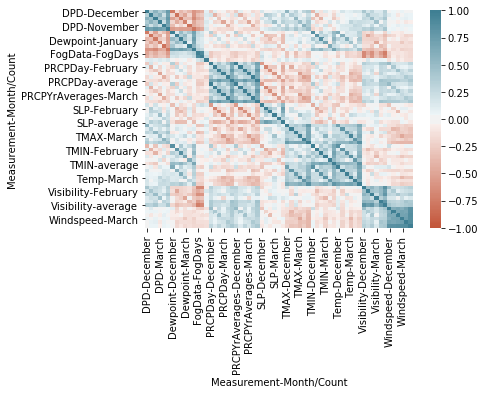

In [7]:
corr = dataF.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)

### Some first observations
- There is definitely some dependencies of precipitation across months.
- Similarly, temperatures across months have dependencies
- Anti correlation between visibilites and dependencies is interesting
- Dewpoints, Fogdays do have inverse relationship with DPD - I don't know what DPD is!
- SLP and PRCPYr has some inverse relationship
- In a very crude manner, most of the data is anticorrelated

### As the path forward, we are going to identify what each column says and how data is collected.


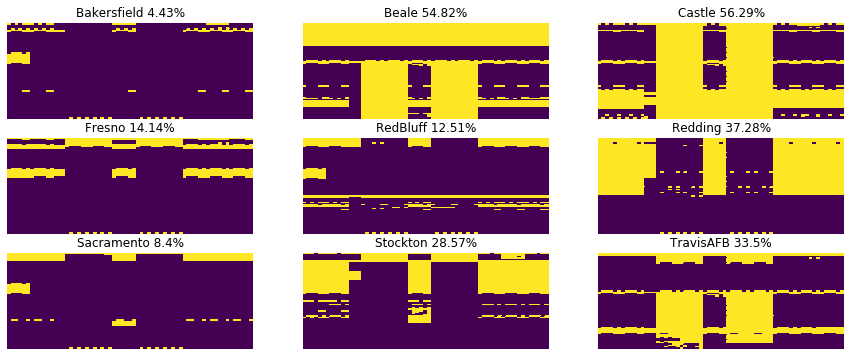

In [8]:
cShape = 3
f, axes = plt.subplots(cShape, cShape, figsize = (15,6))
for city in cityNames:
    cx, cy = cityNames.index(city)//cShape, cityNames.index(city)%cShape 
    sns.heatmap(dataF.loc[city].isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=axes[cx, cy])
    perCent = str(round(dataF.loc[city].isna().sum().sum()*100/ (dataF.loc[city].isna().sum().sum() + dataF.loc[city].count().sum()),2))
    axes[cx, cy].axis('off')
    axes[cx, cy].set_title(city + ' ' + perCent + '%')

### From the above graph, we can see a more than 25% of data is missing in more than 5 cities